# Pandas for time series

Pandas is very useful for handling time series. 

First we'll need some data. I started at [Diskos](https://portal.diskos.cgg.com/whereoil-data/). It's a bit confusing as there are a lot of places to get data, but I've heard of FactPages so let's start there.

## FactPages... Use pandas to read CSV directly

Right-click and copy URL for CSV from this link:

http://factpages.npd.no/factpages/Default.aspx?culture=nb-no&nav1=field&nav2=TableView|Production|Saleable|Monthly

This file is saved at `https://geocomp.s3.amazonaws.com/data/Norway_field_production_monthly.csv` as well, in case the link breaks.

In [3]:
csv = "https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field_production_monthly&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=165.225.35.29&CultureCode=nb-no"

In [15]:
import pandas as pd

df = pd.read_csv(csv)

In [16]:
df.head()

,prfInformationCarrier,prfYear,prfMonth,prfPrdOilNetMillSm3,prfPrdGasNetBillSm3,prfPrdNGLNetMillSm3,prfPrdCondensateNetMillSm3,prfPrdOeNetMillSm3,prfPrdProducedWaterInFieldMillSm3,prfNpdidInformationCarrier
0,33/9-6 DELTA,2009,7,0.00025,0.0,-0.00004,0.0,0.00021,0.00051,44576
1,33/9-6 DELTA,2009,8,0.00325,0.0,0.00014,0.0,0.00339,0.00063,44576
2,33/9-6 DELTA,2009,9,0.00317,0.0,0.00010,0.0,0.00327,0.00316,44576
3,33/9-6 DELTA,2009,10,0.00294,0.0,0.00012,0.0,0.00306,0.00535,44576
4,33/9-6 DELTA,2009,11,-0.00001,0.0,-0.00004,0.0,-0.00005,0.00000,44576


### Exercise

- How many rows are there in this dataframe?
- How many fields are represented? (Look at the column called `'prfInformationCarrier'`)
- How many years of data are there?
- What is the total production?

In [17]:
len(df)

20417

In [18]:
df.describe()

,prfYear,prfMonth,prfPrdOilNetMillSm3,prfPrdGasNetBillSm3,prfPrdNGLNetMillSm3,prfPrdCondensateNetMillSm3,prfPrdOeNetMillSm3,prfPrdProducedWaterInFieldMillSm3,prfNpdidInformationCarrier
count,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,2.041700e+04
mean,2005.586570,6.476221,0.215464,0.123276,0.020464,0.005888,0.365091,0.157288,2.103522e+06
std,10.272533,3.439658,0.401297,0.347626,0.045092,0.029858,0.605786,0.392337,5.373464e+06
min,1971.000000,1.000000,-0.037570,-0.103860,-0.020290,-0.008240,-0.037570,-0.002980,4.343700e+04
25%,1999.000000,3.000000,0.008870,0.000000,0.000000,0.000000,0.036500,0.000000,4.355500e+04
50%,2008.000000,6.000000,0.059050,0.016100,0.002070,0.000000,0.146080,0.004460,4.369900e+04
75%,2014.000000,9.000000,0.246800,0.083990,0.018920,0.000000,0.410320,0.121230,1.578840e+06
max,2019.000000,12.000000,3.453530,3.743890,0.458810,0.462690,4.990650,3.651950,2.941252e+07


In [19]:
df.prfInformationCarrier.unique().size

112

In [20]:
df.prfPrdOeNetMillSm3.sum()

7454.0534800000005

## Rename some columns

### Exercise

Rename some of the columns of the dataframe as follows:

    'prfYear': 'year'
    'prfMonth': 'month'
    'prfInformationCarrier': 'field'
    'prfPrdOilNetMillSm3': 'oil'
    'prfPrdOeNetMillSm3': 'OE'
    'prfPrdProducedWaterInFieldMillSm3': 'water'

In [21]:
columns = {'prfYear': 'year',
           'prfMonth': 'month',
           'prfInformationCarrier': 'field',
           'prfPrdOilNetMillSm3': 'oil',
           'prfPrdOeNetMillSm3': 'OE',
           'prfPrdProducedWaterInFieldMillSm3': 'water',
          }

df = df.rename(columns=columns)

## Add a datetime

We'd like to give this dataframe a **datetime** index with `pandas` datetimes. To do this easily, we need:

- EITHER columns named like `'year'`, `'month'`, `'day'`
- OR a column with a datetime string like `2019-06-30`.

In this dataframe, we have the former, so let's work with that.

### Exercise

- Make a column for the **day**, using a constant like 1.
- Make a datetime column called `'ds'` (for 'date stamp') using `pd.to_datetime()`, passing in a dataframe consisting of the three columns for year, month and the day you just made.
- Finally, to turn the new column into an index, give its name (`'ds'`) to `df.set_index()`.

In [22]:
df['day'] = 1

In [23]:
df[['year', 'month', 'day']].head()

,year,month,day
0,2009,7,1
1,2009,8,1
2,2009,9,1
3,2009,10,1
4,2009,11,1


In [24]:
df['ds'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.set_index('ds')

You should end up with a new dataframe with the `'ds'` column as an index.

In [25]:
df.head()

,field,year,month,oil,prfPrdGasNetBillSm3,prfPrdNGLNetMillSm3,prfPrdCondensateNetMillSm3,OE,water,prfNpdidInformationCarrier,day
ds,,,,,,,,,,,
2009-07-01,33/9-6 DELTA,2009,7,0.00025,0.0,-0.00004,0.0,0.00021,0.00051,44576,1
2009-08-01,33/9-6 DELTA,2009,8,0.00325,0.0,0.00014,0.0,0.00339,0.00063,44576,1
2009-09-01,33/9-6 DELTA,2009,9,0.00317,0.0,0.00010,0.0,0.00327,0.00316,44576,1
2009-10-01,33/9-6 DELTA,2009,10,0.00294,0.0,0.00012,0.0,0.00306,0.00535,44576,1
2009-11-01,33/9-6 DELTA,2009,11,-0.00001,0.0,-0.00004,0.0,-0.00005,0.00000,44576,1


## Simplify the dataframe

Before we carry on, let's simplify the dataframe a bit, reducing it to a few columns: **field**, **water**, **other**, and **oil** (the order is a slightly cheaty way to get the colours I want on the charts, without having to fiddle with them).

In [26]:
df['other'] = df.OE - df.oil
df = df.drop('OE', axis=1)
df = df[['field', 'water', 'other', 'oil']]

In [27]:
df.head()

,field,water,other,oil
ds,,,,
2009-07-01,33/9-6 DELTA,0.00051,-0.00004,0.00025
2009-08-01,33/9-6 DELTA,0.00063,0.00014,0.00325
2009-09-01,33/9-6 DELTA,0.00316,0.00010,0.00317
2009-10-01,33/9-6 DELTA,0.00535,0.00012,0.00294
2009-11-01,33/9-6 DELTA,0.00000,-0.00004,-0.00001


## Time series with `pandas`

`pandas` knows all about time series. So we can easily make a time series plot:

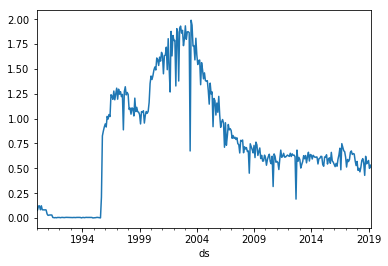

In [177]:
df.oil[df.field=='TROLL'].plot()

We can easily stretch it out, or add other lines:

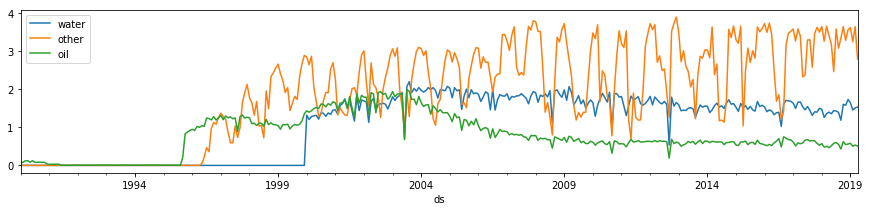

In [178]:
df[df.field=='TROLL'].plot(figsize=(15,3))

Let's make a dataframe of only the TROLL field.

In [179]:
troll = df[df.field=='TROLL']

Now we can slice using natural dates:

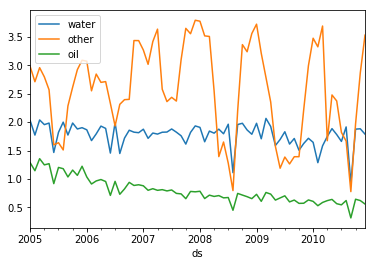

In [180]:
troll['2005':'2010'].plot()

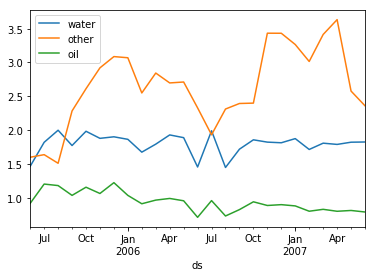

In [181]:
troll['Jun 2005':'Jun 2007'].plot()

Try to imagine doing that in Excel!

Let's get the summed annual production for the Troll field:

In [182]:
troll.loc['2010':'2018'].resample('Y').sum()

,water,other,oil
ds,,,
2010-12-31,19.98388,29.62816,6.86951
2011-12-31,19.84282,25.72520,7.26407
2012-12-31,18.96438,35.81799,7.10043
2013-12-31,17.76114,30.86865,7.09666
2014-12-31,18.74376,30.27524,7.29758
2015-12-31,18.33253,35.97052,7.01422
2016-12-31,17.62508,33.15294,7.34828
2017-12-31,18.02677,38.21286,7.24393
2018-12-31,17.17168,40.03856,6.41034


Throw `.plot()` on the end:

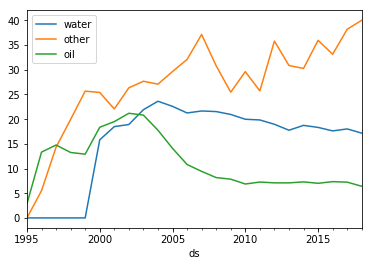

In [183]:
troll.loc['1995':'2018'].resample('Y').sum().plot()

Or we can get totals for *ALL* fields in the database:

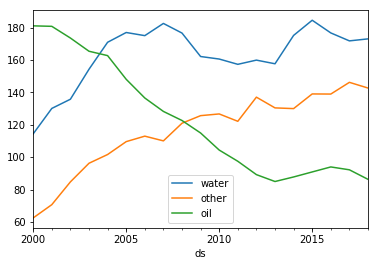

In [184]:
df.loc['2000':'2018'].resample('Y').sum().plot()

Let's look at the contribution TROLL made to NCS production since 1993:

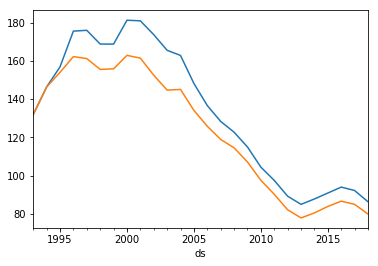

In [185]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.loc['1993':'2018', 'oil'].resample('Y').sum().plot(ax=ax)
df.loc[df.field!='TROLL'].loc['1993':'2018', 'oil'].resample('Y').sum().plot(ax=ax)
plt.show()

----

Looking for forecasting? Head over to...

### [Machine learning time series](Machine_learning_time_series.ipynb)

## Add operators

There's also a list of operators here >> https://factpages.npd.no/factpages/Default.aspx?culture=nb-no&nav1=field&nav2=TableView%7cProduction%7cSaleable%7cMonthly

This file is also in `/data`, but we can read directly from the web with `pandas`, as before:

In [30]:
url = "https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field_operator_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=165.225.35.29&CultureCode=nb-no"
dg = pd.read_csv(url)

In [31]:
dg.head()

,fldName,cmpLongName,fldOperatorFrom,fldOperatorTo,fldNpdidField,cmpNpdidCompany,fldOperatorDateUpdated,datesyncNPD
0,ALBUSKJELL,Phillips Petroleum Company Norway,25.04.1975,22.10.2002,43437,694,03.10.2019,12.11.2019
1,ALBUSKJELL,ConocoPhillips Norge,23.10.2002,31.03.2003,43437,2144081,03.10.2019,12.11.2019
2,ALBUSKJELL,Phillips Petroleum Norsk AS,01.04.2003,05.05.2003,43437,705,03.10.2019,12.11.2019
3,ALBUSKJELL,ConocoPhillips Skandinavia AS,06.05.2003,NaN,43437,2410696,03.10.2019,12.11.2019
4,ALVE,Statoil ASA (old),16.03.2007,30.09.2007,4444332,1622484,03.10.2019,12.11.2019


In [32]:
dg['from'] = pd.to_datetime(dg.fldOperatorFrom)
dg['to'] = pd.to_datetime(dg.fldOperatorTo)
dg['to'] = dg['to'].fillna(pd.to_datetime('today'))

In [173]:
dg.head()

,fldName,cmpLongName,fldOperatorFrom,fldOperatorTo,fldNpdidField,cmpNpdidCompany,fldOperatorDateUpdated,datesyncNPD,from,to
0,ALBUSKJELL,Phillips Petroleum Company Norway,25.04.1975,22.10.2002,43437,694,NaN,03.07.2019,1975-04-25,2002-10-22 00:00:00.000000
1,ALBUSKJELL,ConocoPhillips Norge,23.10.2002,31.03.2003,43437,2144081,01.12.2016,03.07.2019,2002-10-23,2003-03-31 00:00:00.000000
2,ALBUSKJELL,Phillips Petroleum Norsk AS,01.04.2003,05.05.2003,43437,705,01.12.2016,03.07.2019,2003-01-04,2003-05-05 00:00:00.000000
3,ALBUSKJELL,ConocoPhillips Skandinavia AS,06.05.2003,NaN,43437,2410696,NaN,03.07.2019,2003-06-05,2019-07-03 14:01:45.193323
4,ALVE,Statoil ASA (old),16.03.2007,30.09.2007,4444332,1622484,NaN,03.07.2019,2007-03-16,2007-09-30 00:00:00.000000


Let's get the operator of each field, for each month, and put it in our production dataframe.

There is probably a more elegant way to do this with `join` or `merge` or something... but I can't figure it out.

In [174]:
def process_row(row):
    """
    Process a row in df to get the operator at that time.
    
    Note that 'name' is a special attribute for the current index.
    """
    this_df = dg.loc[dg.fldName==row.field, :]
    record = this_df.loc[(dg['from'] < row.name) & (row.name <= dg['to']), "cmpLongName"]
    if any(record.values):
        return record.values[0]
    else:
        return np.nan

In [175]:
df['operator'] = df.apply(process_row, axis=1)

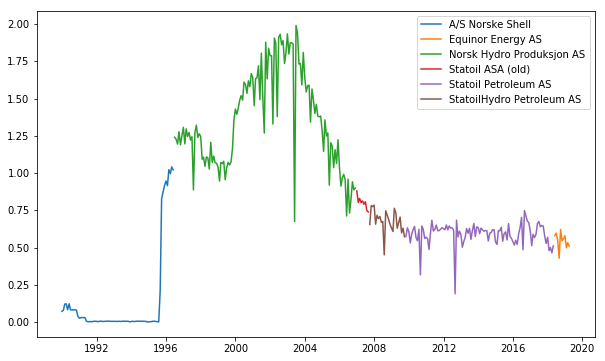

In [176]:
plt.figure(figsize=(10,6))
for name, group in df[df.field=='TROLL'].groupby('operator'):
    plt.plot(group.oil, label=name)
plt.legend()

----

(c) Agile Scientific 2019, licensed CC-BY